In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.shape

(42000, 785)

In [4]:
#checking for null values in dataset
data.isnull().values.sum()

0

In [5]:
#checking for outlier; pixel should be between 0 and 255
columns= data.columns

for col in columns:
    maxi= data[col].max()
    mani= data[col].min()
    if maxi > 255 or mani < 0: 
        print(col)

In [6]:
X = data.drop(columns='label')
y = data.label

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 21)

In [8]:
X_train.shape

(29400, 784)

In [9]:
print("Training set Shape",X_train.shape)
print("Testing set Shape",X_test.shape)

Training set Shape (29400, 784)
Testing set Shape (12600, 784)


In [10]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [11]:
mlp = MLPClassifier(max_iter= 100, hidden_layer_sizes = 80, activation='relu', learning_rate= "adaptive", learning_rate_init = 0.001 , shuffle = True)
mlp

MLPClassifier(hidden_layer_sizes=80, learning_rate='adaptive', max_iter=100)

In [12]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=80, learning_rate='adaptive', max_iter=100)

In [13]:
pred = mlp.predict(X_test)

In [14]:
confusion_matrix(y_test, pred)

array([[1192,    1,    2,    0,    2,    4,    6,    0,    3,    0],
       [   0, 1343,    6,    1,    2,    1,    1,    5,    3,    1],
       [   4,    5, 1194,    4,    8,    0,    3,    8,    7,    1],
       [   4,    2,    7, 1220,    0,   14,    1,    9,    8,    4],
       [   4,    3,   12,    0, 1216,    1,    8,    4,    3,   16],
       [   5,    3,    0,   18,    2, 1111,    8,    0,    7,    1],
       [   6,    0,    5,    1,    5,    6, 1250,    1,    3,    0],
       [   1,    6,   13,    5,    4,    4,    0, 1287,    2,   17],
       [   1,    4,    5,   14,    7,   12,    9,    3, 1136,    9],
       [   5,    3,    0,    4,   19,    6,    1,   14,    3, 1231]],
      dtype=int64)

In [15]:
acu = accuracy_score(y_test, pred) * 100
print("The accuracy of MLP model is : {:.2f}" .format(acu), "%")

The accuracy of MLP model is : 96.67 %


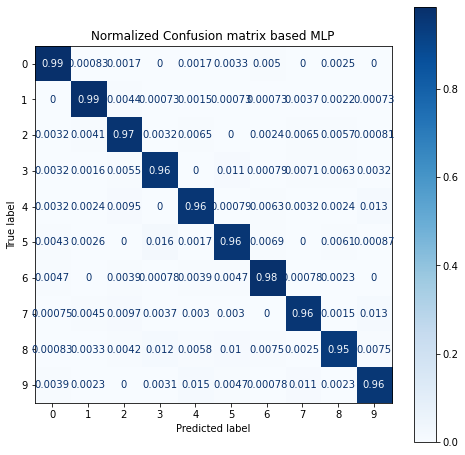

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=ax)  
#plt.figure(figsize=(25,10))
plt.title("Normalized Confusion matrix based MLP")
plt.show()

In [17]:
K = [1, 2, 5, 10]
for k in K:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    accuracy = accuracy_score(y_test, pred)
    print("Accuracy score is: {:.3f}"
          .format(accuracy), "when value of k is", k)
    print()

Accuracy score is: 0.937 when value of k is 1

Accuracy score is: 0.924 when value of k is 2

Accuracy score is: 0.935 when value of k is 5

Accuracy score is: 0.930 when value of k is 10

